## Описание проекта

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

---

<a id='start'></a>

## 1. Загрузка данных
   * <a href='#step_1'> Загружаем библиотеки </a>
   * <a href='#step_1'> Откроем файлы и изучим их </a>
          - Путь к файлу: (/datasets/insurance.csv)
   * <a href='#step_1.1'> Разделим данные на тренировочную выборку и целевой признак </a>
   * <a href='#step_1.end'> Вывод </a>

## 2. Умножение матриц
   * <a href='#step_2'> Знакомство с формулами </a>
   * <a href='#step_2.1.1'> Создадим модель по исходным формулам для предсказания значений по неизменённым признакам </a>
   * <a href='#step_2.1'> Вычислим значения $R2$ и $ MSE$ для предсказанных значений по исходным (неизменённым данным)   </a>
  
   * <a href='#step_2.3'> Произведём изменение признаков исходной матрицы методом умножения их на произвольную обратимую матрицу </a>
       * <a href='#step_2.4'>  Проверим результат </a>
   * <a href='#step_2.end'> Ответ/Пояснение  </a>   
   
   
## 3. Алгоритм преобразования
   * <a href='#step_3'>Алгоритм</a>
   * <a href='#step_3.1'> Обоснование</a>
   * <a href='#step_3.end'> Вывод </a>

## 4. Проверка алгоритма
   * <a href='#step_4'> Создадим матрицу  $P$ </a>
   * <a href='#step_4.1'>Вычислим предсказание модели </a>
   * <a href='#step_4.2'>Изобразим на графике предсказанные значения относительно истинных значений целевого столбца</a>
   * <a href='#step_4.3'>Сравнение $R2$ и $MSE$ изменённой/неизменённой матрицы признаков </a>
   
## 5. Вывод
   * <a href='#step_5.end'> Вывод </a>

---
---

## Загружаем библиотеки

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

<a id="step_1"></a>
## 1. Загрузка данных

In [ ]:
data = pd.read_csv('insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<a id="step_1.2"></a>
### Просмотим зависимотсть целевого значения от других признаков в наших данных на гарфике

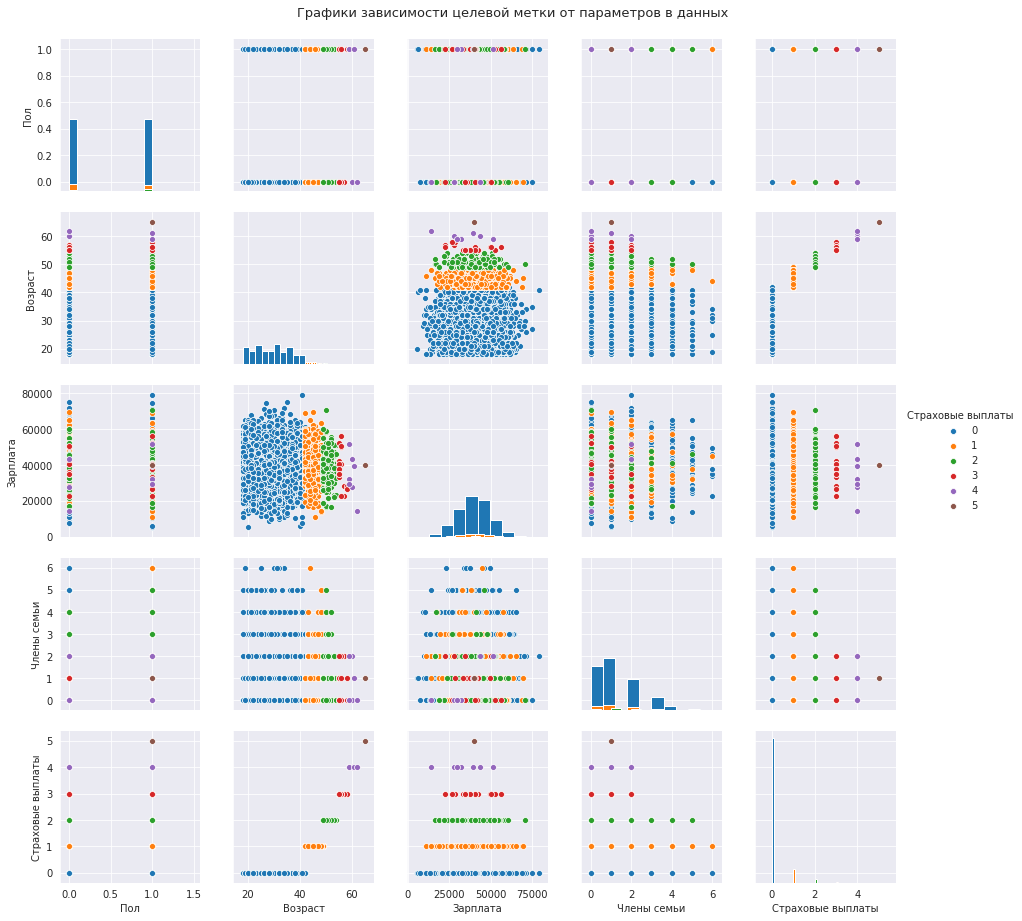

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(data, hue='Страховые выплаты', height=2.5, diag_kind='hist')
plt.suptitle("Графики зависимости целевой метки от параметров в данных", y=1.02, fontsize=13)
plt.show()

<a id="step_1.1"></a>
### Разделим данные на тренировочную выборку и целевой признак

In [ ]:
features=data.drop(['Страховые выплаты'],axis=1)
target=data['Страховые выплаты']

### Определим тестовую и тренировочну выбрку

In [ ]:
train_features, test_features, train_target, test_target = train_test_split(features,target, test_size=0.25, random_state=254)

### Проверим результат

In [ ]:
tv=train_features.shape[0]/features.shape[0]
tt=test_target.shape[0]/target.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(tv))
print('Размер тестовой выборки - {:.0%}'.format(tt))

Размер тренировочной выборки- 75%
Размер тестовой выборки - 25%


<a id="step_1.end"></a>
### Вывод

Отлично! Все данные на месте и не требуют предобработки. Из графиков видно что, по объёму не выплат страховок больше всего, а если и производятся то чаще всего это люди старше 40 лет с семьями от 2х человек

---

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_2"></a>
## 2. Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw + w0
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

<a id="step_2.1.1"></a>
### Создадим модель по исходным формулам для предсказания значений по неизменённым признакам

In [ ]:
class LinearRegress:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [ ]:
model = LinearRegress()
model.fit(train_features, train_target)
predict = model.predict(test_features)

R2_score = r2_score(test_target, predict)
MSE = mean_squared_error(predict,test_target)

print("R2_score:", R2_score.round(2))
print("MSE:", MSE.round(2))

R2_score: 0.42
MSE: 0.11


<a id="step_2.1"></a>
### Вычислим значения R2 и MSE для предсказанных значений по исходным (неизменённым данным) 

In [ ]:
model_l = LinearRegression()
model_l.fit(train_features,train_target)
predictions= model_l.predict(test_features)

R2_score_l = r2_score(test_target, predictions)
MSE_l = mean_squared_error(predictions,test_target)

print("R2_score Линейной регрессии неизменённой матрицы:", R2_score_l.round(2))
print("MSE Линейной регрессии неизменённой матрицы:", MSE_l.round(2))

R2_score Линейной регрессии неизменённой матрицы: 0.42
MSE Линейной регрессии неизменённой матрицы: 0.11


### График зависимости значений истинные/предсказанные модели линейной регрессии из Scikit-learn

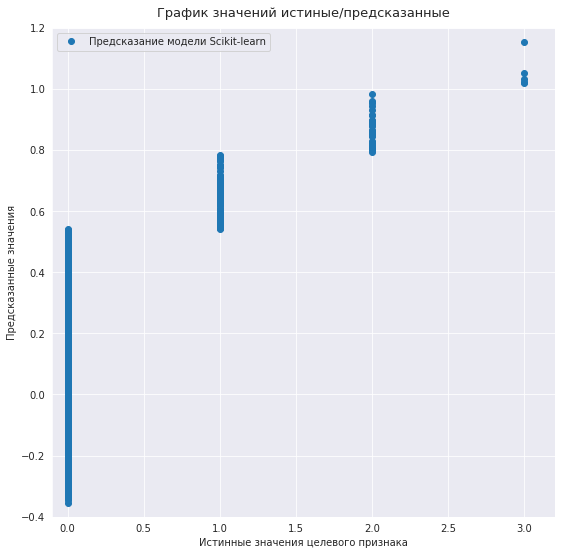

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(test_target,predictions,'o',alpha=1)
plt.legend(['Предсказание модели Scikit-learn'])
#plt.plot([-0.1,3.2],[-0.5,1.2],linestyle='--',color='g',alpha=0.3)
plt.xlim(-0.1,3.2)
plt.ylim(-0.4,1.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

<a id="step_2.3"></a>
### Произведём изменение признаков исходной матрицы данных методом умножения их на произвольную обратимую матрицу

##### Создадим произвольную матрицу по длине совпадающую с шириной нашей выборки

In [ ]:
matrix=np.random.normal(3, size=(4,4))
matrix

array([[4.1380297 , 2.95978838, 3.60307812, 1.26928617],
       [4.07314183, 1.09608861, 2.38581906, 2.93547158],
       [3.32279584, 3.76251041, 3.13894834, 1.54386751],
       [2.7289447 , 4.77409833, 2.75401249, 3.74498434]])

##### Проверим обратимость нашей матрицы

In [ ]:
np.linalg.inv(matrix)

array([[-2.97882213,  1.09682947,  3.84473564, -1.43511853],
       [-1.76146808,  0.2976426 ,  2.31328926, -0.58994277],
       [ 4.84505294, -1.46969249, -5.78998769,  1.89679184],
       [ 0.85317484, -0.09789374, -1.49272798,  0.66996689]])

### Произведём умножение признаков на произвольную матрицу

##### Тренировочная выборка

In [ ]:
train_matrix=train_features.dot(matrix)
train_matrix.columns = train_features.columns
train_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
883,131006.421166,148270.701990,123727.420883,60893.769767
4736,165681.683941,187434.460491,156442.889651,77033.454358
4455,137692.744271,155806.683690,130029.175758,64010.859502
3993,165247.575811,187030.807235,156069.349340,76805.680817
651,135383.120299,153189.440877,127844.945594,62947.258142


##### Применим те же изменения для тестовой выборки и умножим на ту же матрицу

In [ ]:
test_matrix = test_features.dot(matrix)
test_matrix.columns = test_features.columns
test_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
4948,126423.815283,143023.684627,119374.669388,58780.592085
4959,114822.517486,129872.837241,108407.324065,53404.634298
1728,125723.877147,142255.776038,118723.821896,58446.256012
4169,145983.441313,165208.575353,137867.003336,67858.786390
1984,148363.733995,167865.033898,140098.405029,68982.209274


<a id="step_2.4"></a>
### Проверим результат 

In [ ]:
model_t = LinearRegression()
model_t.fit(train_matrix,train_target)
predictions_t= model_t.predict(test_matrix)
print("R2_score Линейной регрессии изменённой матрицы:", r2_score(test_target,predictions_t).round(2))
print("MSE Линейной регрессии изменённой матрицы:", mean_squared_error(predictions_t,test_target).round(2))

R2_score Линейной регрессии изменённой матрицы: 0.42
MSE Линейной регрессии изменённой матрицы: 0.11


### Нанесём на график зависимости значений истинные/предсказанные модели линейной регрессии предсказанные значения модели на изменённых данных

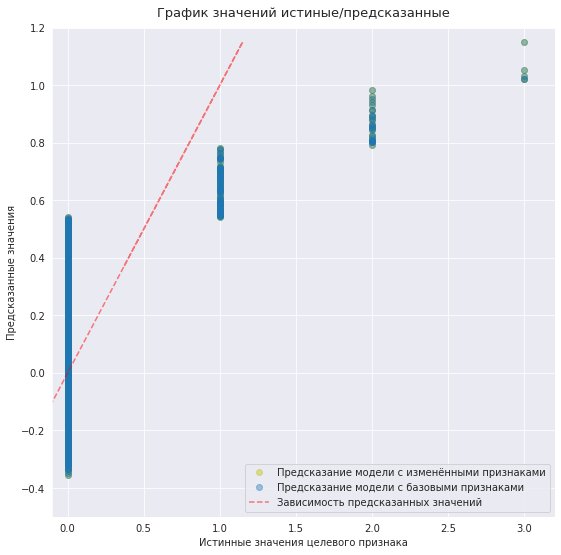

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(test_target,predictions_t,'yo',alpha=0.4)
plt.plot(test_target,predictions,'o',alpha=0.4)
plt.plot(predictions_t,predictions,'r--',alpha=0.5)
plt.legend(['Предсказание модели c изменёнными признаками', 'Предсказание модели c базовыми признаками', 'Зависимость предсказанных значений'])

plt.xlim(-0.1,3.2)
plt.ylim(-0.5,1.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

<a id="step_2.end"></a>
### Ответ: 
   Если признаки исходных данных умножить на обратимую матрицу, то качество `линейной регрессии` **не изменится**.

### Пояснение: 
   Изменение качества предсказания `линейной регрессии` не происходит при умножении признаков исходных данных, на обратимую матрицу, т.к. параметры `линейной регрессии` в исходной задаче и в преобразованной связаны между собой алгоритмом преобразования признаков, по результату работы которого предсказание вычисляется методом умножения признаков исходных данных на вектор по длине равный ширине таблицы признаков, который в свою очередь умножается на целевые признаки. По результату скалярного умножения создаётся число, на которое умножается тестовая выборка, и если эта выборка была преобразована умножением на ту же матрицу, то качество предсказания не изменится.<br><br>
       Таким образом, если изменить исходные данные методом умножения признаков на обратимую матрицу, не изменяя значений целевого признака, качество предсказания модели не изменится. 


---

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_3"></a>
## 3. Алгоритм преобразования

### Алгоритм

Умножение матрицы на матрицу возможно, если ширина первой матрицы $А(𝑚×𝑛)$ равна высоте второй матрицы $P (𝑛×r)$. Тогда размер произведения этих матриц будет $m×r$. Размерность n «cхлопывается».

При умножении признаков выборки $A$ размерностью $(3750,4)$ на обратимую произвольную матрицу $P$ размерностью $(4,4)$, результатом получаем новый *(изменённый)* набор данных скалярных произведений $M$ размернотью $(3750, 4)$<br>
Формула выглядит следующим образом:
$$
Mij = (Ai,Bj)
$$
В каждую новую ячейку записывается результат сложения произведений строки $i$ на столбец $j$. Так например в первой ячейке новой таблицы будет записан результат по этой формуле:
$$
M_{11}=A_{11}×P_{11} + A_{12}×P_{21} + A_{13}×P_{31} + A_{14}×P_{41}
$$

Далее вычисляется важный параметр - вектор $w$ по формуле:
$$
w = (X^T X)^{-1} X^T y
$$
<br>
В которой $X$ - таблица признков, где нулевой столбец заполнен $1$ (единицами), а $y$ - вектор целевого признака<br><br>
$$
X_{i} = (1  M_{i2} M_{i3} M_{i4} M_{i5})
$$

В `Линейной регрессии` предсказания вычисляются по формуле:

$$
a = Xw + w0
$$, 
где $w0$ - значение нулевого аргумента вектора $w$, которое предствляет собой величину сдвига модели, при подборе которого можно достигать более низкого значения среднеквадратичного отклонения $MSE$

Рассмотрим упрощённую запись формулы предсказания `Линейной регрессии`
$
a = X_i w
$,  где $X_i$ - новые строки признаков<br>
Подставим вместо параметра $w$, формулу её вычисления:
$$
a = X_i w = X_i (X^T X)^{-1} X^T y
$$

Упроситим формулу используя принцип ассоциативности ($A(BC) = (AB)C$) и то, что транспонированное произведение матриц равно произведению транспонированных матриц взятых в обратном порядке ($(AB)^T = B^T A^T$):

$$
a = X_i (X^T X)^{-1} X^T y = X_iX^{-1}(X^T)^{-1}X^T y = X_iX^{-1}y
$$

Домножим наши признаки на случайную матрицу $P$, в которой число строк равно чилу столбцов $X$ и $P$ - обратима, то есть из матрицы $P$ можно получить матрицу $P^{-1}$, при этом $PP^{-1} = E$, где $E$ - единичная матрица <br>

Если обучить нашу модель на новых (изменённых) признаках, то модель найдёт новые коэффициенты $w'$

$$
w' = ((XP)^T(XP))^{-1}(XP)^Ty
$$

Подставим их в формулу предсказания и упростим выражение

$$
a'= X_iPw' = X_iP((XP)^T(XP))^{-1}(XP)^Ty = X_iP(XP)^{-1}((XP)^T)^{-1}(XP)^Ty = X_iX^{-1}y
$$

Таким образом мы пришли к заключению, о том что результат предсказания не изменится не смотря на измениения признаков, т.к. исходя из результатов наших преобразований очевидно, что $a$ = $a'$

### Алгоритм преобразования (план действий):

1. Создаём рандомную матрицу $P$<br>
2. Проверяем её на обратимость <br>
3. Создаём новую матрицу данных $M$ <br>
4. Ищем метрики качества $R2 score$ и $MSE$ на исходных данных и на преобразованных<br>
5. Опишем вывод полученных результатов

<a id="step_3.1"></a>
### Обоснование

Это значит, что если мы произведём умножение признаков тренировочной и тестовой выборок на одну и ту же обратимую матрицу, то результатом предсказания будет произведение нашей изменённой таблицы с признаками на вектор, который был получен из той же таблицы с изменёнными данными увеличенную на ту же величину, что и признаки тренировочных данных. Проверим работу данного алгоритма в следующей главе.

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_4"></a>
## 4. Проверка алгоритма

##### Создадим матрицу $P$ 

In [ ]:
P = np.random.normal(3, size=(4,4))
P

array([[3.58716694, 4.01583665, 1.49854026, 3.9410247 ],
       [3.18383197, 4.40270453, 3.01210583, 2.66865409],
       [2.64239579, 3.28765895, 3.51333953, 3.68469409],
       [4.08191663, 3.259362  , 2.72252137, 4.10973421]])

##### Проверим обратимость нашей матрицы

In [ ]:
np.linalg.inv(P)

array([[-0.39212036,  0.2672469 , -0.71675692,  0.84511463],
       [ 0.36081727,  0.29105881,  0.03651773, -0.56774517],
       [-0.49493744,  0.15436185,  0.24007956,  0.159135  ],
       [ 0.4311827 , -0.59852996,  0.52390146, -0.25122035]])

##### Отлично, матрица создана и она обратима. <br>Выполним умножение признаков на нашу новую матрицу и обозначим её $M$

In [ ]:
M =train_features.dot(P)
M.columns = train_features.columns
M.head()

,Пол,Возраст,Зарплата,Члены семьи
883,104181.336475,129629.478664,138491.554046,145237.098704
4736,131754.987143,163948.423275,175116.122614,183636.580603
4455,109497.966373,136248.823603,145548.354155,152633.173430
3993,131411.151765,163509.589767,174689.486016,183201.394841
651,107666.902735,133966.045835,143103.208263,150071.554076


##### Применим те же изменения для тестовой выборки и умножим на ту же матрицу $M$

In [ ]:
test_M = test_features.dot(P)
test_M.columns = test_features.columns
test_M.head()

,Пол,Возраст,Зарплата,Члены семьи
4948,100536.510849,125101.215248,133622.570944,140125.166465
4959,91315.887162,113626.587410,121350.624264,127253.137245
1728,99978.075784,124405.589328,132894.597236,139361.496309
4169,116091.220518,144450.360152,154319.654545,161834.234044
1984,117987.267387,146811.072593,156820.582526,164453.763226


##### Целевые признаки оставляем без изменений. 
##### Далее в нулевой столбец нашей изменённой таблицы вносим значение 1

In [ ]:
X = np.concatenate((np.ones((M.shape[0], 1)), M), axis=1)

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,1.0,104181.336475,129629.478664,138491.554046,145237.098704
1,1.0,131754.987143,163948.423275,175116.122614,183636.580603
2,1.0,109497.966373,136248.823603,145548.354155,152633.173430
3,1.0,131411.151765,163509.589767,174689.486016,183201.394841
4,1.0,107666.902735,133966.045835,143103.208263,150071.554076


##### Присвоим переменной $у$, целевые признаки и вычислим по формуле ( $w = (X^T X)^{-1} X^T y$ )  вектор $w$

In [ ]:
y = train_target
w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

<a id="step_4.1"></a>
##### Вычислим предсказание модели методом умножения тестовой выбрки $test_M$  и увеличим на величину сдвига значение $w0$  Переменную предсказанных значений обозначим $a$

In [ ]:
a = test_M.dot(w[1:]) + w[0]

##### Проверим значения R2 и MSE

In [ ]:
R2_score_m=r2_score(test_target, a)
MSE_m=mean_squared_error(a, test_target)
print("R2_score:",R2_score_m.round(2))
print("MSE:", MSE_m.round(2))

R2_score: 0.42
MSE: 0.11


<a id="step_4.2"></a>
#### Изобразим на графике предсказанные значения относительно истинных значений целевого столбца и сравним эти значения с предсказаниями модели по неизменённым признакам

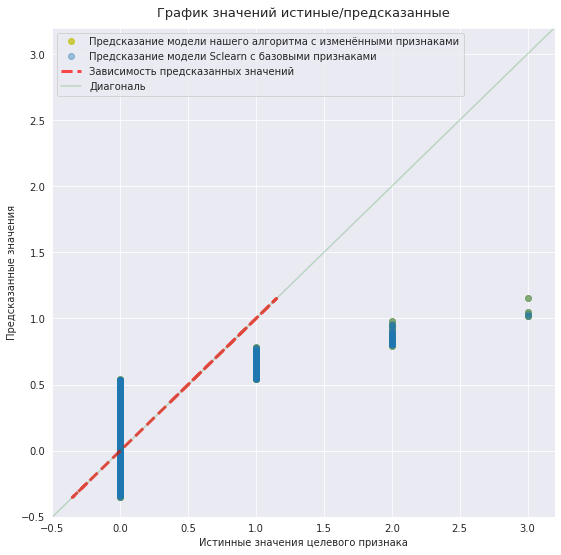

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(test_target,a,'yo',alpha=0.7)
plt.plot(test_target,predictions,'o',alpha=0.4)
plt.plot(a,predictions,'r--',alpha=0.7,linewidth = 3)
plt.plot([-0.5,3.2],[-0.5,3.2],linestyle='-',color='g',alpha=0.2)
plt.legend(['Предсказание модели нашего алгоритма c изменёнными признаками', 'Предсказание модели Sclearn c базовыми признаками','Зависимость предсказанных значений','Диагональ'])

plt.xlim(-0.5,3.2)
plt.ylim(-0.5,3.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

<a id="step_4.3"></a>
#### Сравнение R2 и MSE изменённой/неизменённой матрицы признаков

In [ ]:
comparison_tabl = pd.DataFrame(index=['R2_score','MSE'], columns=['Изменённая матрица','Неизменённая матрица'])
comparison_tabl['Изменённая матрица'] = R2_score_m, MSE_m
comparison_tabl['Неизменённая матрица'] = R2_score_l, MSE_l

comparison_tabl.T

,R2_score,MSE
Изменённая матрица,0.416687,0.112489
Неизменённая матрица,0.416687,0.112489


---

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_5"></a>
## 5. Вывод

От нас требовалось защитить данные клиентов страховой компании «*Хоть потоп*» и разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Преобразование требовалось произвести  таким образом, чтобы по результату работы нашего алгоритма, качество моделей машинного обучения не ухудшилось.

В результате нашей работы был разработан <a href='step_3'>алгоритм</a>, где данные были преобразованы методом умножения признаков исходных данных на обратимую матрицу $P$. Результатом такого преобразования явилась новая *(изменённая)* матрица признаков, которая справилась с основными задачами по шифровке данных и при сравнении качества предсказаний с моделью из $Scikit-learn$, сохранила значения $R2$ и $ MSE$ неизменными.

Таким образом мы выполнили требования поставелнной задачи и компания «*Хоть потоп*» может спать спокойно!

---